# COMP2002 Jupyter Notebook Template
Jupyter Notebook for the 70% Coursework for COMP2002.

Task 1.1 - Data Preparation

In [1]:
#Add all imports here
from sklearn.model_selection import cross_val_score
import pandas
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [14]:
#Data preparation
columnNames = ["X1","X2","X3","X4","X5","X6","X7","X8","Y1","Y2"]
data = pandas.read_excel("COMP2002Data.xlsx", names = columnNames)
values = data.values
inputs = values[:,:8].astype(float)
targets = values[:,8:].astype(float)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)
X_train, X_test, Y_train, Y_test = train_test_split(scaled, targets)

Task 1.2 - Regression

Random Forest

In [15]:
#RandomForestGenerator regressor code

regressorRandomForest = RandomForestRegressor(max_depth=20)
regressorRandomForest.fit(X_train, Y_train)
Y_pred = regressorRandomForest.predict(X_test)

#End of RandomForestGenerator regressor code

In [16]:
#NeuralNetwork regressor code

regressorMLP = MLPRegressor(max_iter=16000)
regressorMLP.fit(X_train, Y_train)
Y_pred = regressorMLP.predict(X_test)

#End of NeuralNetwork regressor code

In [17]:
#SVR Regressor Code

regressorSVR = SVR(max_iter=10000)
regressorSVR2 = SVR(max_iter=10000)
regressorSVR.fit(X_train,Y_train[:,0])
regressorSVR2.fit(X_train,Y_train[:,1])
Y_pred = regressorSVR.predict(X_test)
X_pred = regressorSVR2.predict(X_test)

#End of SVR Regressor code

Task 1.3 - Cross Validation

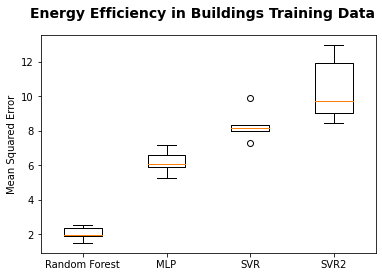

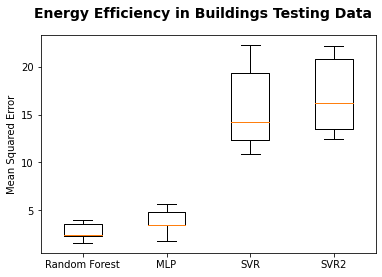

In [18]:
#Cross validation for each of the training scores
scoresRandomForest = cross_val_score(regressorRandomForest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
scoresMLP = cross_val_score(regressorMLP, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
scoresSVR = cross_val_score(regressorSVR, X_train, Y_train[:,0], cv=5, scoring='neg_mean_squared_error')
scoresSVR2 = cross_val_score(regressorSVR2, X_train, Y_train[:,1], cv=5, scoring='neg_mean_squared_error')
#Making all the training validation positive
scoresRandomForest = np.abs(scoresRandomForest)
scoresMLP = np.abs(scoresMLP)
scoresSVR = np.abs(scoresSVR)
scoresSVR2 = np.abs(scoresSVR2)
#Cross validation for each of the testing scores
test_scoresRandomForest = cross_val_score(regressorRandomForest, X_test, Y_test, cv=5, scoring='neg_mean_squared_error')
test_scoresMLP = cross_val_score(regressorMLP, X_test, Y_test, cv=5, scoring='neg_mean_squared_error')
test_scoresSVR = cross_val_score(regressorSVR, X_test, Y_test[:,0], cv=5, scoring='neg_mean_squared_error')
test_scoresSVR2 = cross_val_score(regressorSVR2, X_test, Y_test[:,1], cv=5, scoring='neg_mean_squared_error')

#Making all the testing validation positive
test_scoresRandomForest = np.abs(test_scoresRandomForest)
test_scoresMLP = np.abs(test_scoresMLP)
test_scoresSVR = np.abs(test_scoresSVR)
test_scoresSVR2 = np.abs(test_scoresSVR2)

###Plotting the training validation data onto a boxplot

plt.boxplot([scoresRandomForest, scoresMLP, scoresSVR, scoresSVR2])
plt.suptitle('Energy Efficiency in Buildings Training Data', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xticks([1,2,3,4], ['Random Forest', 'MLP', 'SVR', 'SVR2'])
plt.show()

###Plotting the testing validation data onto a boxplot
plt.boxplot([test_scoresRandomForest, test_scoresMLP, test_scoresSVR, test_scoresSVR2])
plt.suptitle('Energy Efficiency in Buildings Testing Data', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xticks([1,2,3,4], ['Random Forest', 'MLP', 'SVR', 'SVR2'])
plt.show()

# Task 2: Optimisation

In [2]:
#Variable that reads the data from the txt file
data = pandas.read_csv("Modules.txt", sep = "|", header = None)

data


,0,1,2,3
0,MOD001,Zacharias Karstensen,2,"MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD0..."
1,MOD002,Dominykas Cleary,2,"MOD001,MOD003,MOD004,MOD005,MOD006,MOD007,MOD0..."
2,MOD003,Zacharias Karstensen,2,"MOD001,MOD002,MOD004,MOD005,MOD006,MOD007,MOD0..."
3,MOD004,Laila Deniau,1,"MOD001,MOD002,MOD003,MOD005,MOD006,MOD007,MOD0..."
4,MOD005,Brahma O Braonain,2,"MOD001,MOD002,MOD003,MOD004,MOD006,MOD007,MOD0..."
5,MOD006,Brahma O Braonain,3,"MOD001,MOD002,MOD003,MOD004,MOD005,MOD007,MOD0..."
6,MOD007,Ruh Kerekes,1,"MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD0..."
7,MOD008,Brahma O Braonain,2,"MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD0..."
8,MOD009,Dominykas Cleary,3,"MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD0..."
9,MOD010,Dominykas Cleary,2,"MOD001,MOD002,MOD003,MOD004,MOD005,M0D006,MOD0..."


In [3]:
#Module class to hold objects
class Module:
    def __init__(self, moduleName, moduleLeader, labs, clashes, isLab):
        self.moduleName = moduleName
        self.moduleLeader = moduleLeader
        self.labs = labs
        self.clashes = clashes
        self.isLab = isLab

#An array that will hold all the information about the specific module
list = []
for index, row in data.iterrows():
    list.append(Module(row[0], row[1], row[2], row[3], False))

In [4]:
def RuinAndRecreate():
    #Creates the module list with the amount of times it has to go into the timetable
    import random
    solution = []
    moduleAmount = []
    for i in range(len(list)):
        moduleAmount.append(list[i])
        for j in range(int(list[i].labs)):
            moduleAmount.append(Module(
                list[i].moduleName,
                list[i].moduleLeader,
                list[i].labs,
                list[i].clashes,
                True
            ))
    #Make sure that the frame gets filled
    while(len(moduleAmount) < 60):
        moduleAmount.append(Module("", "", 0, 0, False))
    #Shuffled the array for a random solution
    np.random.shuffle(moduleAmount)
    df = pandas.DataFrame(columns=['LEC1','LAB1','LAB2'],index=range(0,20))
    j = 0
    k = 0
    for i in range(len(moduleAmount)):
        if i < 20:
            df.loc[i, 'LEC1'] = moduleAmount[i]
        elif i >= 20 and i < 40:
            df.loc[j, 'LAB1'] = moduleAmount[i]
            j += 1
        elif i >= 40 and i < 60:
            df.loc[k, 'LAB2'] = moduleAmount[i]
            k += 1
    solution.append(df)
    return df

## Print module names in timetable

In [5]:
#Function that just prints out the timetable with the names for testing sake
def printTimetable(timetable):
    timetableModuleNames = pandas.DataFrame(columns=['LEC1','LAB1','LAB2'],index=range(0,20))
    j = 0
    k = 0
    for i in range(60):
        if i < 20:
            timetableModuleNames.loc[i, 'LEC1'] = timetable.loc[i, 'LEC1'].moduleName
        elif i >= 20 and i < 40:
            timetableModuleNames.loc[j, 'LAB1'] = timetable.loc[j, 'LAB1'].moduleName
            j += 1
        elif i >= 40 and i < 60:
            timetableModuleNames.loc[k, 'LAB2'] = timetable.loc[k, 'LAB2'].moduleName
            k += 1
    return timetableModuleNames

printTimetable(RuinAndRecreate())

,LEC1,LAB1,LAB2
0,MOD001,MOD013,
1,MOD012,MOD009,MOD002
2,MOD014,MOD003,MOD015
3,,MOD006,MOD001
4,,MOD008,
5,MOD005,MOD017,MOD001
6,MOD006,MOD007,MOD010
7,,MOD007,MOD011
8,MOD004,MOD006,MOD013
9,,MOD012,MOD016


### Fitness Function

In [18]:
def concurrence_constraints(timetable):
    concurrence = 0
    for i in range(len(timetable)):
        #Get a list of the clashes for the Lecture
        currentModuleClashes = timetable.loc[i, 'LEC1'].clashes
        currentModuleClashes = str(currentModuleClashes).split(",")#Split because python is weird
        if timetable.loc[i, 'LAB1'].moduleName in currentModuleClashes:#Checks if the option in LAB1 is in the clashes
            concurrence += 1
        if timetable.loc[i, 'LAB2'].moduleName in currentModuleClashes:#Checks if the option in LAB2 is in the clashes
            concurrence += 1
        currentModuleClashes = timetable.loc[i, 'LAB1'].clashes#Check if LAB1 and LAB2 clash
        currentModuleClashes = str(currentModuleClashes).split(",")
        if timetable.loc[i, 'LAB2'].moduleName in currentModuleClashes:
            concurrence += 1
        
        if timetable.loc[i, 'LEC1'].moduleName == timetable.loc[i, 'LAB1'].moduleName:#Check if lecture is repeated
            concurrence += 1
        if timetable.loc[i, 'LEC1'].moduleName == timetable.loc[i, 'LAB2'].moduleName:
            concurrence += 1
        if timetable.loc[i, 'LAB1'].moduleName == timetable.loc[i, 'LAB2'].moduleName:
            concurrence += 1
    print(concurrence)
    return concurrence
    
#concurrence_restraints(RuinAndRecreate())
def precendence_constraints(timetable):
    #Iterate through the timetable
    #If not, add to the list of lecturesInTimetable
    #If a lab is found in a lab room, check that the lecture has already been found
    #If it has been found, make sure that it is above in the timetable
    precedence = 0
    lecturesInTimetable = []
    for i in range(len(timetable)):
        if timetable.loc[i, 'LEC1'].isLab == True:
            if timetable.loc[i, 'LEC1'].moduleName not in lecturesInTimetable:
                precedence += 1
        else:
            if timetable.loc[i, 'LEC1'].moduleName not in lecturesInTimetable:
                for j in range(i, 0, -1):
                    if timetable.loc[j, 'LAB1'].moduleName == timetable.loc[i, 'LEC1'].moduleName:
                        if timetable.loc[j, 'LAB1'].isLab == True:
                            precedence += 1
                    elif timetable.loc[j, 'LAB2'].moduleName == timetable.loc[i, 'LEC1'].moduleName:
                        if timetable.loc[j, 'LAB2'].isLab == True:
                            precedence += 1
                    else:
                        lecturesInTimetable.append(timetable.loc[i, 'LEC1'].moduleName)
    print(precedence)
    return precedence

def fitness(timetable):
    return concurrence_constraints(timetable) * precendence_constraints(timetable)



22
9


198

## Task 2.2 - Hillclimber

In [37]:
def mutation(parent):
    idx = np.random.randint(parent.shape[0])
    child = parent.copy()
    return child

In [13]:
def less_than_equal(a,b):
    return a <= b

In [46]:
def hillclimber(Niter, fitness, mutation, compare):
    #Initialise a random solution.
    parent = RuinAndRecreate()
    parent_fitness = fitness(parent)
    for i in range(Niter):
        child = mutation(parent)
        child_fitness = fitness(child)

        if compare(child_fitness, parent_fitness):
            parent = child
            parent_fitness = child_fitness

    return parent, parent_fitness

In [48]:
x, y = hillclimber(30, RuinAndRecreate(), mutation, less_than_equal)

TypeError: 'DataFrame' object is not callable